In [1]:
# Import all the libraries needed for the data analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Using "AFTERS" algo for analysis part:
### A - Acquire
### F - Filter
### T - Transform
### ER - ExploRe
### S - Split

# 1.Data Acquisition
#### 1.1.Extract data
#### 1.2.Scrape data
#### 1.3.Query data
#### 1.4.Collect data
#### 1.5.Combine data

### 1.1.Extract data

In [2]:
# read the dataset
data = pd.read_csv('heart.csv')

### 1.2.Scrape data

In [3]:
# The info was taken from the kaggle dataset after the Google research

# Columns Analysis(with value limits):
# 1) age - each person's age (0 - 150)

# 2) sex - each person's sex:
#     0 - Female
#     1 - Male

# 3) cp - different types of the chest pain:
#     0 - Typical angina
#     1 - Atypical angina
#     2 - Non-angina pain
#     3 - Asymptomatic

# 4) trestbps - resting blood pressure (according to the data it is Systolic Blood Pressure)
#     ≤50 - Dangerously low
#     ≤60 - Very low
#     <90 - Low
#     <120 - Normal
#     120-129 - Elevated
#     130-139 - Hypertension stage I
#     140-159 - Hypertension stage II
#     >180 - Hypertensive crisis

# 5) chol - serum cholesterol (Cholesterol is a naturally produced fatty substance in the liver with a wax-like texture. Once     created, it enters the bloodstream to reach different body parts. The term ‘serum cholesterol’ refers to cholesterol levels found in the blood. )
#     < 200 mg/dl - Norm
#     200-239 mg/dl - Moderate risk
#     > 240 mg/dl - High risk

# 6) fbs - Fasting blood glucose (FBG) (depicts fasting blood glucose (FBG) of individual in mg/dl (unit)).
#     0 -  FBG < 120mg/dl - Norm
#     1 - FBG > 120mg/dl - High(typical of diabetic patients and diabetic patients are twice more likely to have a heart disease)
     

# 7) restecg - Resting ECG (electrocardiogram)
#     0 - asymptomatic
#     1 - normal
#     2 - ST wave abnormality

# 8) thalach - Maximum heart rate achieved (bpm)

# 9) exang - Exercise induced angina: this is when exercises causes angina (is a chest pain or discomfort caused when your heart muscle doesn’t get enough oxygen-rich blood).
#     0 - No
#     1 - Yes

# 10) oldpeak - ST depression induced by exercise relative to rest

# 11) slope - The slope of the peak exercise ST segment
#     0 - downsloping
#     1 - flat
#     2 - upsloping

# 12) ca - Number of major vessels (0-3) colored by fluoroscopy
#     if the vassel is not colored - there is a clot, otherwise there is no clot

# 13) thal - A thallium stress test is a nuclear imaging test that shows how well blood flows into the heart while you’re exercising or at rest.
#     1 - Fixed defect
#     2 - Normal
#     3 - Reversable defect

# 14) Target
#     0 - No disease
#     1 - There is disease



In [4]:
# What does the dataset looks like?
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# What is the shape of the dataset?
data.shape

(303, 14)

In [6]:
### Comment: number of rows 303, number of columns 14

In [7]:
# What are the datatypes of columns? How much null data has the dataset?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
### Comment: the dataset has not null data

In [9]:
# What is the basic data description?
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
### Comment: there are some difference between data columns description of the dataset taken after the Google research and the 
###          data desription received after the 'describe()' method:
###          1) In the 'ca' column number of major vessels is not 4, but 5 (0-4)
###          2) 'thal' column has the range from 0 to 3, but not from 1 to 3.
### The frist notation can be ignored, but with the second I don't know what to do. There is not enough info I received

# 2.Data Filtering
#### 2.1. Outliers
#### 2.2. Errors/Noise
#### 2.3. Duplicates
#### 2.4. Invalid data

### 2.1. Outliers
I didn't found any outliers. All the data in this dataset is useful for the data analysis and machine learning

### 2.2. Errors/Noise

In [11]:
# Are there any missing values in the dataset?
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
### Comment: As was mentioned earlier, there are not null values

### 2.3. Duplicates

In [13]:
# Are there any duplicates in the dataset?
data.duplicated().sum()

1

In [14]:
### Comment: there is one duplication row

In [15]:
# How to drop the duplication row?
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(303, 14)
(302, 14)


In [16]:
### Comment: duplicated row was succesfully deleted
## Simple check:
data.duplicated().sum()

0

### 2.4. Invalid data
Invalid data was not found

# 3.Data Transformation
#### 3.1.Columns renaming ( if is necessary for better data orientation)
#### 3.2.Formatting ( Data type conversion, Datetime cast)
#### 3.3.Translation/ Mapping
#### 3.4.Text to integer/float


## 3.1.Columns renaming

In [17]:
# How it would be suitable to name the columns?
data.columns = ['age', 'sex', 'chest_pain', 'resisting_blood_pressure','cholesterol', 
                'fasting_bood_glucose', 'resisting_ecg', 'max_heart_rate', 'angina_exercice', 'st_describ', 
                'slope', 'major_vassels', 'thallium_stress', 'result']

In [18]:
### Comment: some of the columns where renamed for better working with the data
### age -> age 
### sex -> sex
### cp -> chest_pain
### trestbps -> resisting_blood_pressure
### chol -> cholesterol
### fbs -> fasting_bood_glucose
### restecg -> resisting_ecg
### thalach -> max_heart_rate
### exang -> angina_exercice
### oldpeak -> st_describ
### slope -> slope
### ca -> major_vassels
### thal -> thallium_stress
### target -> result

In [19]:
data.head()

,age,sex,chest_pain,resisting_blood_pressure,cholesterol,fasting_bood_glucose,resisting_ecg,max_heart_rate,angina_exercice,st_describ,slope,major_vassels,thallium_stress,result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3.2.Formatting ( Data type conversion, Datetime cast)

In [20]:
# remind the common info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       302 non-null    int64  
 1   sex                       302 non-null    int64  
 2   chest_pain                302 non-null    int64  
 3   resisting_blood_pressure  302 non-null    int64  
 4   cholesterol               302 non-null    int64  
 5   fasting_bood_glucose      302 non-null    int64  
 6   resisting_ecg             302 non-null    int64  
 7   max_heart_rate            302 non-null    int64  
 8   angina_exercice           302 non-null    int64  
 9   st_describ                302 non-null    float64
 10  slope                     302 non-null    int64  
 11  major_vassels             302 non-null    int64  
 12  thallium_stress           302 non-null    int64  
 13  result                    302 non-null    int64  
dtypes: float64

In [21]:
# How does the get_dimmies() method work?
pd.get_dummies(data['result'])

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
298,1,0
299,1,0
300,1,0
301,1,0


In [22]:
# Create a copy of the dataset
data_copy = data.copy()
### Whould it be easier to split the data like 'chest_pain' using get_dummies?
data_dummy = pd.get_dummies(data_copy.chest_pain)
data_dummy.columns = ['Typical angina','Atypical angina', 'Non-angina pain', 'Asymptomatic']
data_copy = data_copy.join(data_dummy)

In [23]:
### Comment: later it would be used for the easier data visualization 
data_copy

,age,sex,chest_pain,resisting_blood_pressure,cholesterol,fasting_bood_glucose,resisting_ecg,max_heart_rate,angina_exercice,st_describ,slope,major_vassels,thallium_stress,result,Typical angina,Atypical angina,Non-angina pain,Asymptomatic
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,1,0,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,0,0,0,1
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,1,0,0,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,1,0,0,0


## 4.Data Exploration
#### Trends
#### Relationships
#### Anomalies
#### Patterns
#### Hypothesis testing
#### Data Visualisation

In [24]:
data['result'].value_counts(normalize=True)

1    0.543046
0    0.456954
Name: result, dtype: float64

In [25]:
### Comment: ~54% of people in the dataset have heart didease and ~46% - don't have it

<AxesSubplot:ylabel='result'>

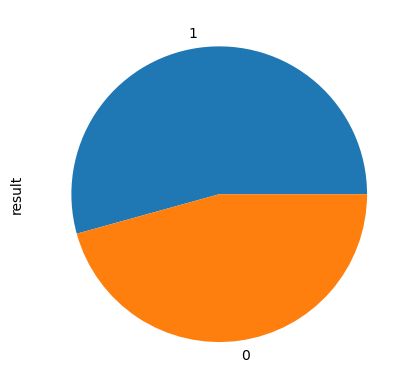

In [26]:
data['result'].value_counts(normalize=True).plot(kind='pie')

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'chest_pain'}>,
        <AxesSubplot:title={'center':'resisting_blood_pressure'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'fasting_bood_glucose'}>,
        <AxesSubplot:title={'center':'resisting_ecg'}>,
        <AxesSubplot:title={'center':'max_heart_rate'}>],
       [<AxesSubplot:title={'center':'angina_exercice'}>,
        <AxesSubplot:title={'center':'st_describ'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'major_vassels'}>],
       [<AxesSubplot:title={'center':'thallium_stress'}>,
        <AxesSubplot:title={'center':'result'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

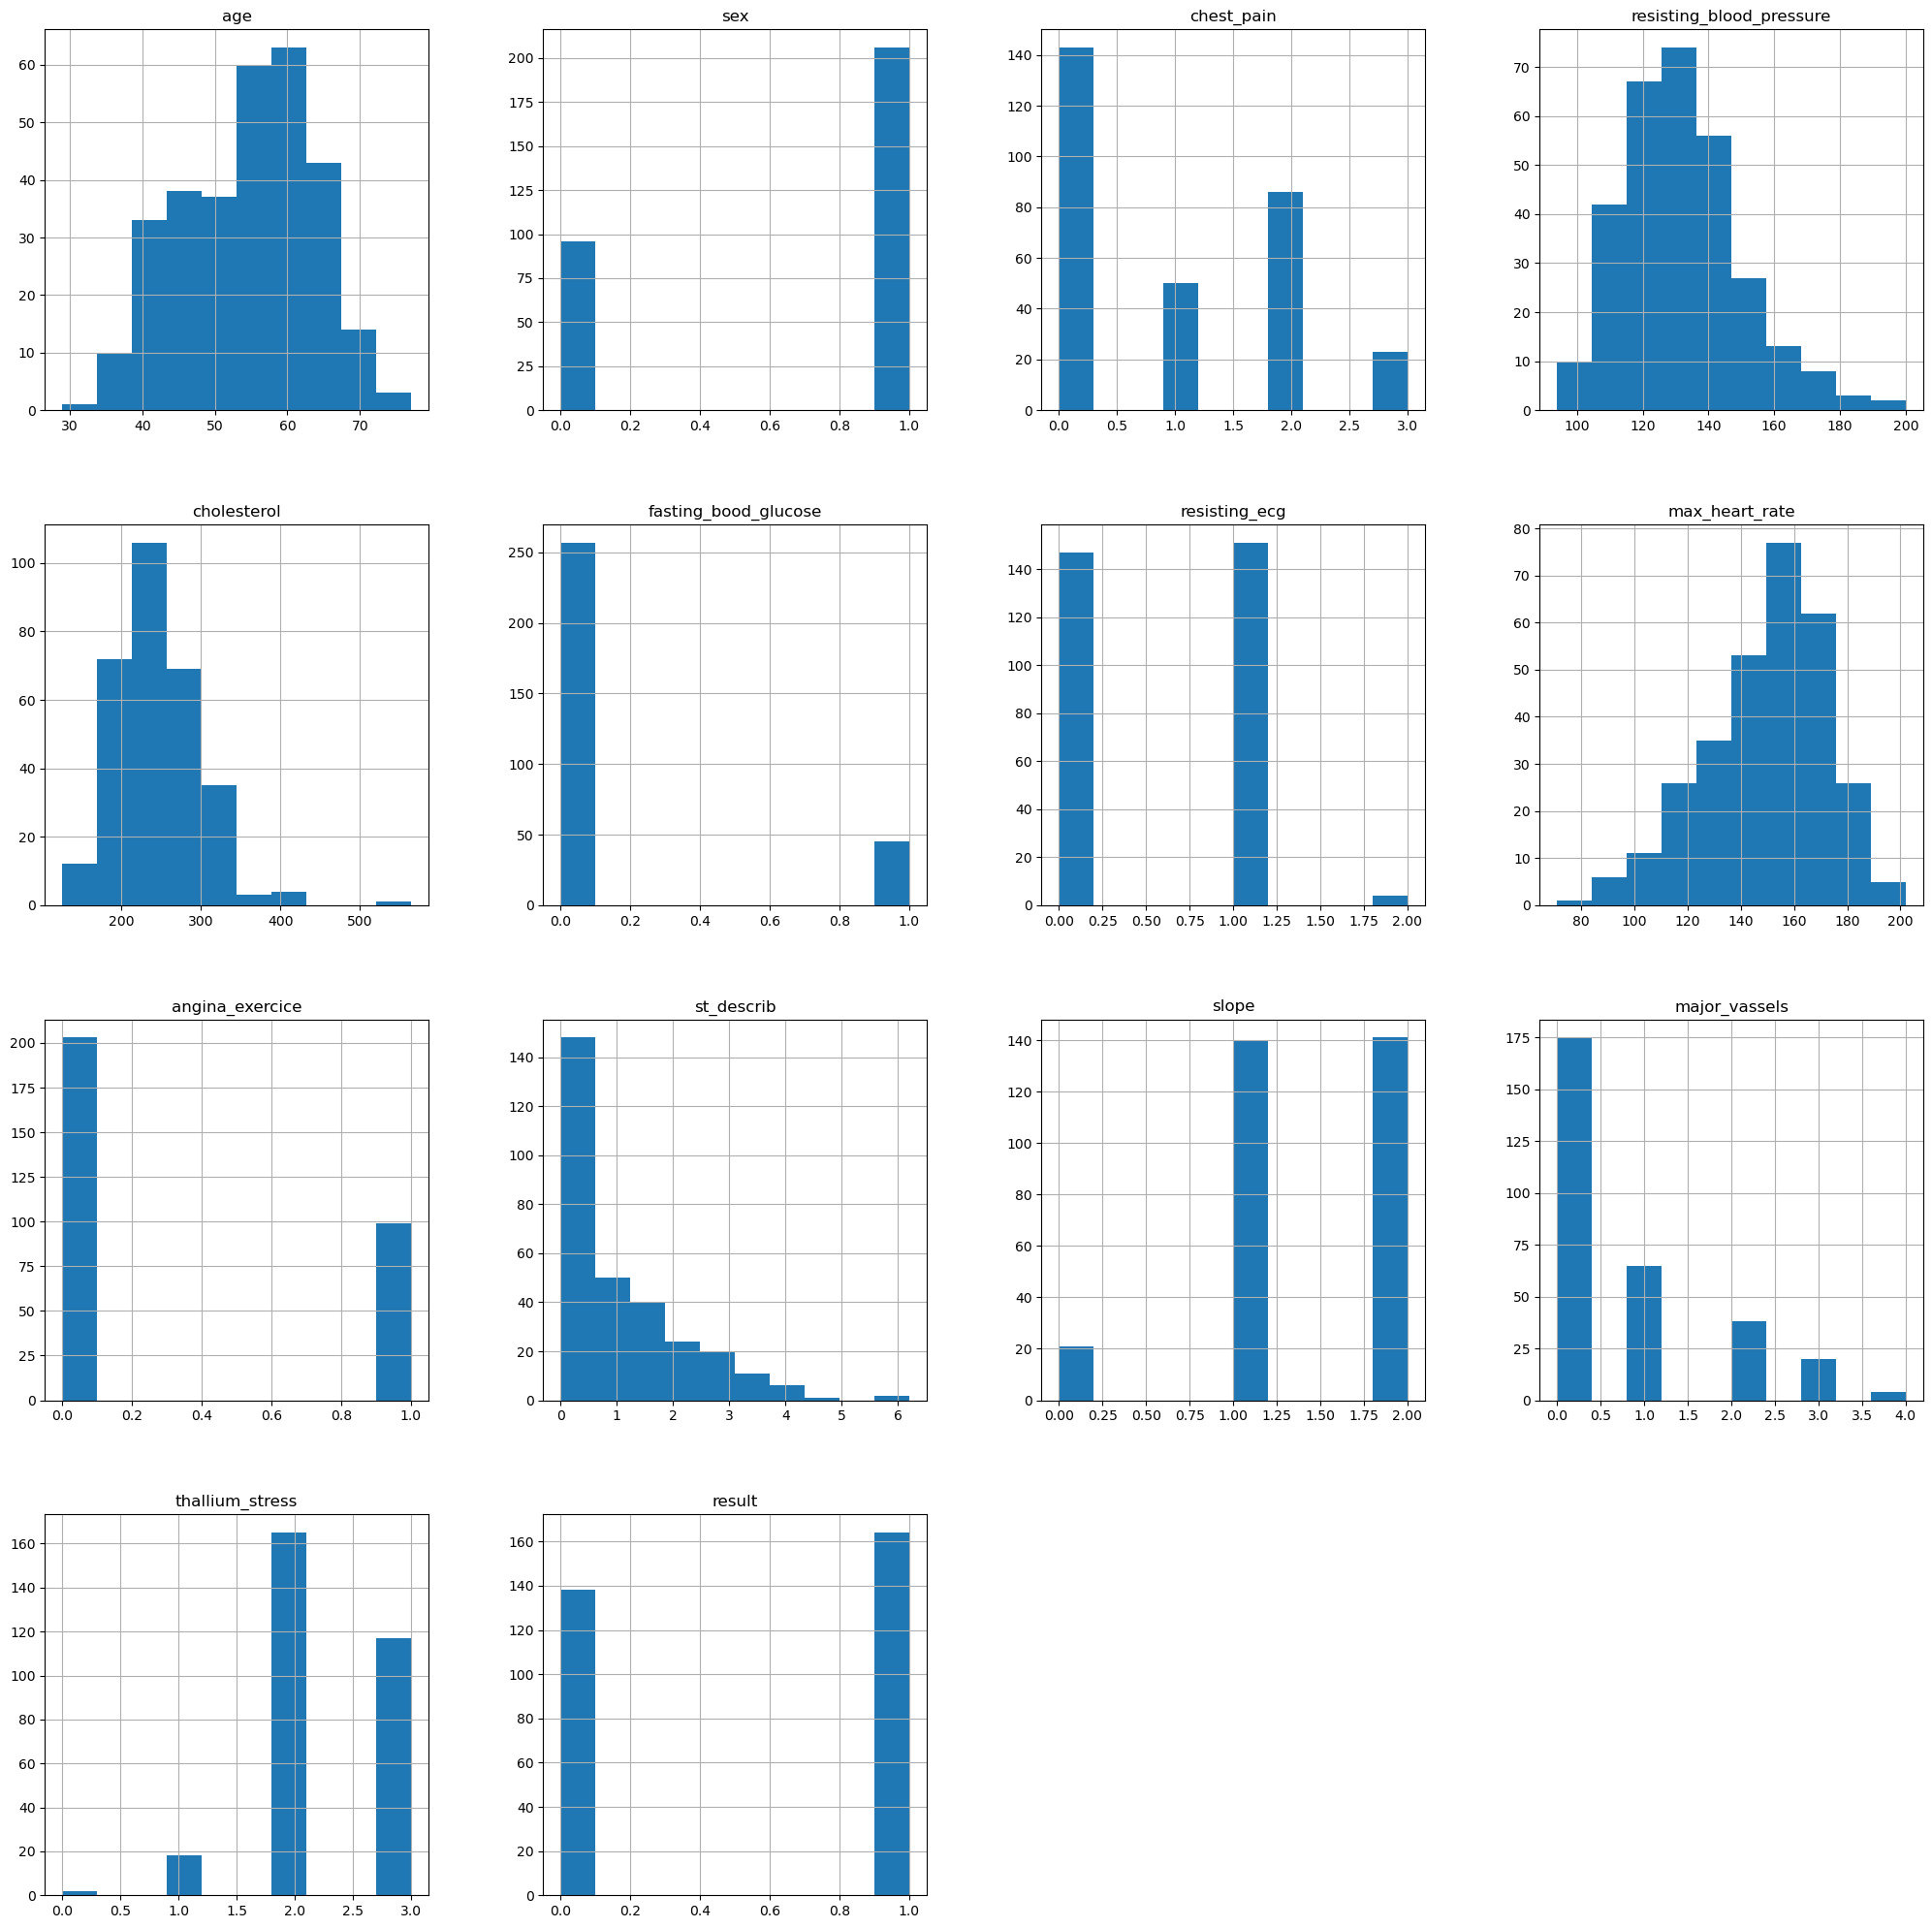

In [27]:
# How does the data look like separatelly?
data.hist(figsize=(25, 25))

In [28]:
###  Conclusion according to the histogramms:
### 1) There are almost twice as much men then wemen
### 2) almost all the people from the dataset are over 35 y.o.
### 3) dominated chest pains are: Typical angina and Non-angina pain
### 4) most people from the dataset have high serum cholesterol
### 5) there are ~five times more people with normal fastind blood glucose 
### 6) resisting ecg data has small number of ST wave abnormality 
### 7) twice as many people withoun angina experience
### 8) dominated thallium test results are: Reversable defect and normal
### 9) people with well working all the vassels are equal to the sum of others 

In [29]:
# What columns grouped by results has the largest difference of mean?
data.groupby('result').mean()

,age,sex,chest_pain,resisting_blood_pressure,cholesterol,fasting_bood_glucose,resisting_ecg,max_heart_rate,angina_exercice,st_describ,slope,major_vassels,thallium_stress
result,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.585366,0.560976,1.371951,129.250000,242.640244,0.140244,0.591463,158.378049,0.140244,0.586585,1.591463,0.341463,2.121951


In [30]:
### Comment: the people with heard disease have less angina exerience, state description and major_vassels

<AxesSubplot:xlabel='result'>

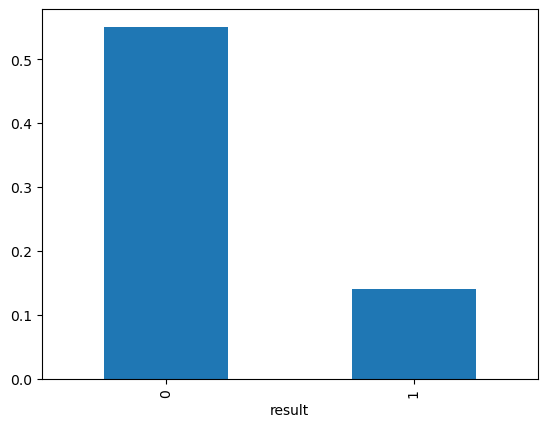

In [31]:
# visualise the most interesting
data.groupby('result')['angina_exercice'].mean().plot(kind='bar')

<AxesSubplot:xlabel='result'>

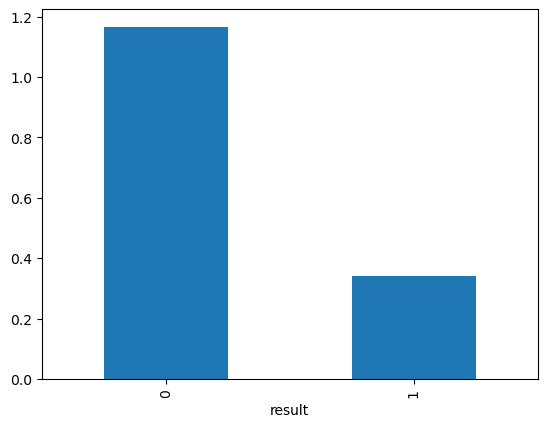

In [32]:
data.groupby('result')['major_vassels'].mean().plot(kind='bar')

<AxesSubplot:xlabel='result'>

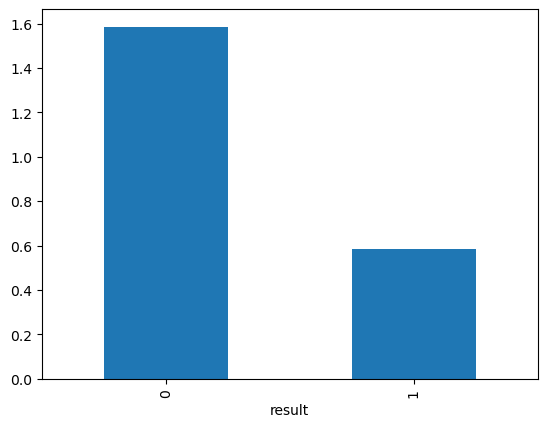

In [33]:
data.groupby('result')['st_describ'].mean().plot(kind='bar')

C:\Temp\ipykernel_2340\3977054082.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_copy.groupby('result')['Typical angina', 'Atypical angina', 'Non-angina pain', 'Asymptomatic'].mean().plot(kind = 'bar', xlabel='result')


<AxesSubplot:xlabel='result'>

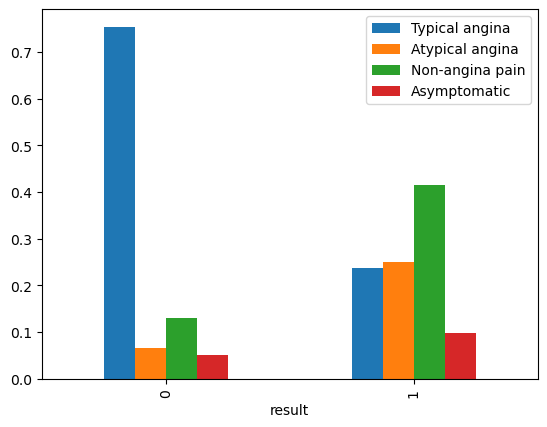

In [34]:
data_copy.groupby('result')['Typical angina', 'Atypical angina', 'Non-angina pain', 'Asymptomatic'].mean().plot(kind = 'bar', xlabel='result')

In [35]:
### Comment: The halthy people have mostly typial angina, therefore people with heart diseases has mostly Atypical angina and Non-angina pain

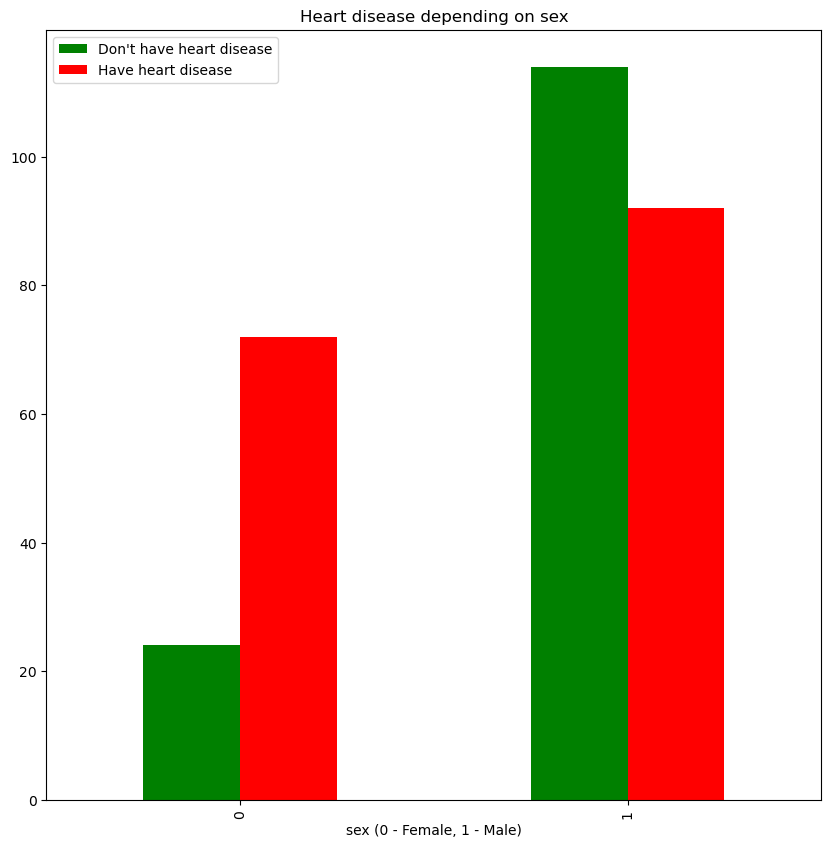

In [36]:
# What is the likehood of a heart attack relative to gender (Male, Female)?
pd.crosstab(data.sex, data.result).plot(kind="bar",figsize=(10,10),color=['green', 'red' ])
plt.title('Heart disease depending on sex')
plt.xlabel('sex (0 - Female, 1 - Male)')
plt.legend(["Don't have heart disease", 'Have heart disease'])

# Conlusion: women are more likely to have a heart disease than men

In [37]:
# What is the correlation of all the data?
data.corr()

,age,sex,chest_pain,resisting_blood_pressure,cholesterol,fasting_bood_glucose,resisting_ecg,max_heart_rate,angina_exercice,st_describ,slope,major_vassels,thallium_stress,result
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
chest_pain,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
resisting_blood_pressure,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
cholesterol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fasting_bood_glucose,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
resisting_ecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
max_heart_rate,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
angina_exercice,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
st_describ,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

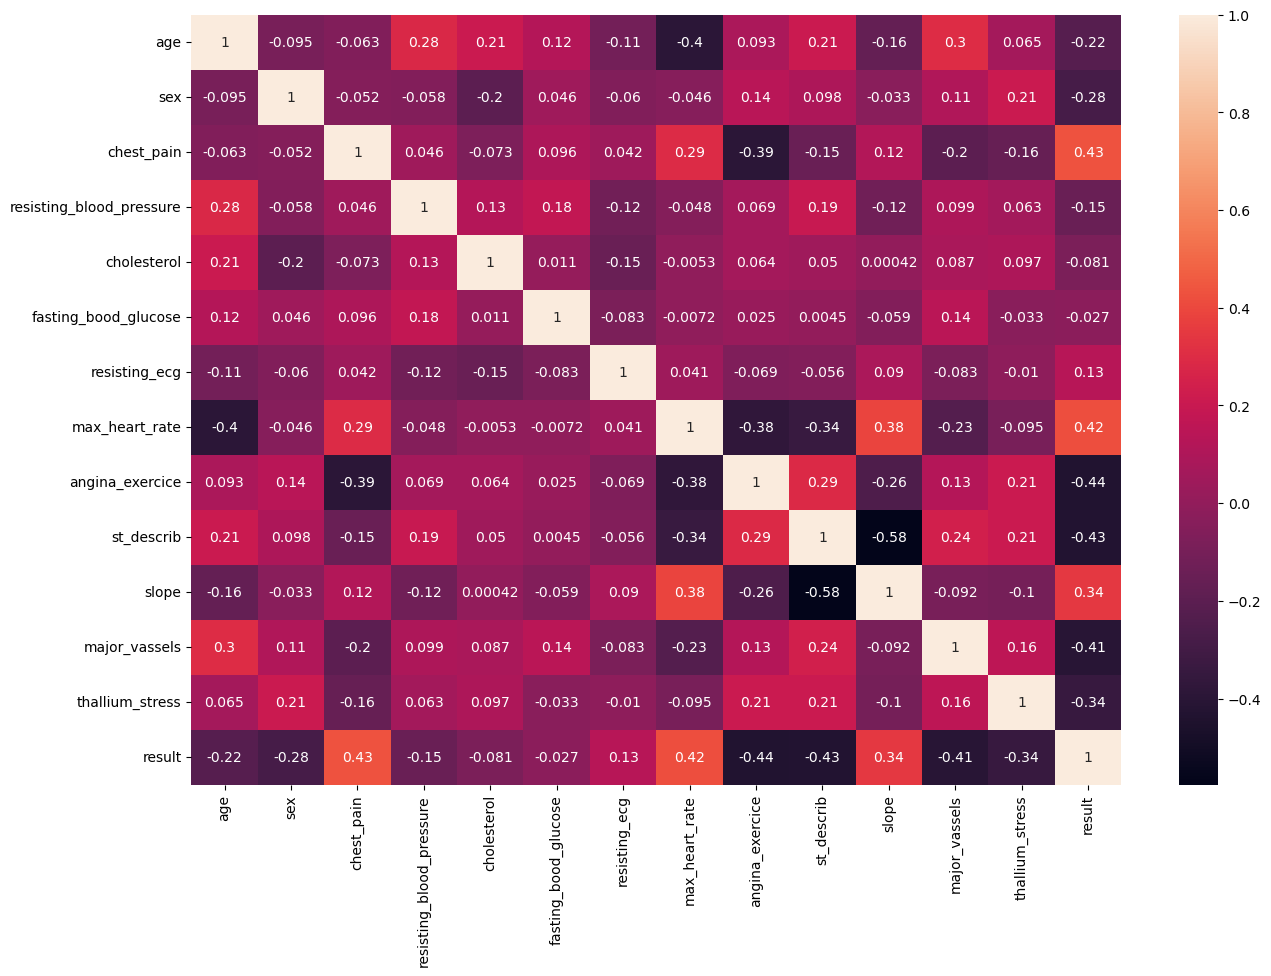

In [38]:
# visualization of data correlation
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

In [39]:
### Comment: Result value mostly depends on such fators as:
#              * sex (inversely proportional) (0 - Female, 1 - Male)
#              * chest pain (inversely proportional)
#              * maximum heart rate (direstly proportional)
#              * angeina exercise (inversely proportional)
#              * ST depression (inversely proportional)
#              * slope (direstly proportional)
#              * number of major vessels colored by fluoroscopy (inversely proportional)
#              * thallium streess test results (inversely proportional)

Text(0, 0.5, 'Maximum heart rate achieved (bpm)')

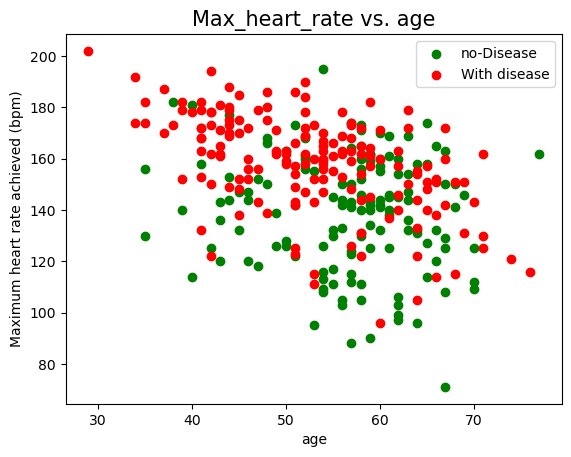

In [40]:
# What is the relationship between age and max_heart_rate?

plt.scatter(x=data[data.result == 0]['age'], y=data[data.result == 0]['max_heart_rate'], color='green')
plt.scatter(x=data[data.result == 1]['age'], y=data[data.result == 1]['max_heart_rate'], color= 'red')
plt.title('Max_heart_rate vs. age', fontsize=15)
plt.legend(['no-Disease', 'With disease'])
plt.xlabel('age',fontsize=10)
plt.ylabel('Maximum heart rate achieved (bpm)', fontsize=10)

In [41]:
### Comment: younger people have higher maximum heart rate and higher heart attach risk
### * but the dataset is too small and the only one person elder then 30, so I think the error of this onclusion is too large

<AxesSubplot:xlabel='sex', ylabel='age'>

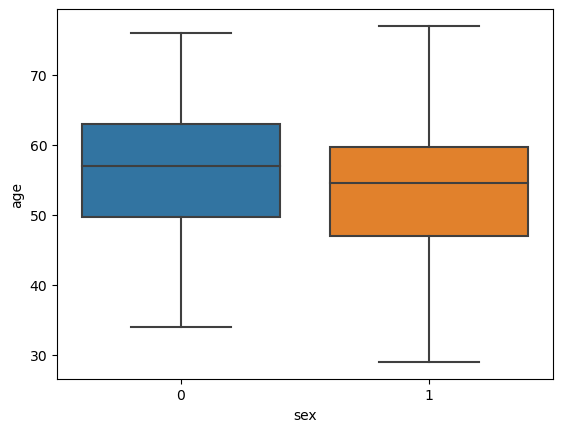

In [42]:
# What is the distribution between age and gender?
sns.boxplot( x=data["sex"], y=data["age"] )

In [43]:
### Comment: Wemen are older then men in this dataset

<AxesSubplot:>

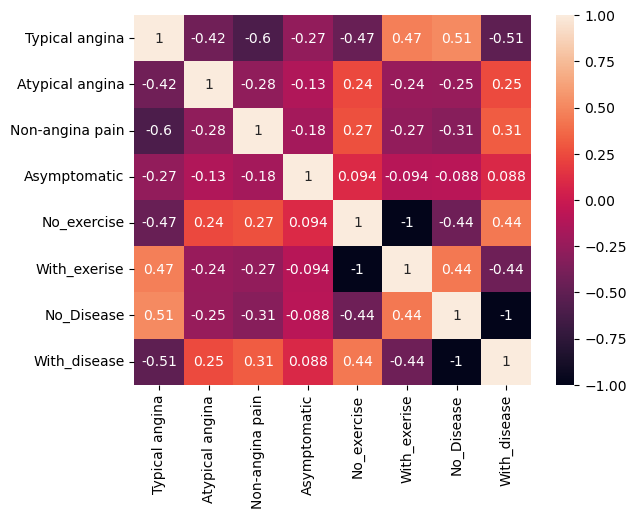

In [44]:
# What are the relationships between chest pain, angina exercise and results?
data_dummy = pd.get_dummies(data.chest_pain)
data_dummy.columns = ['Typical angina','Atypical angina', 'Non-angina pain', 'Asymptomatic']
df = data_dummy.copy()
data_dummy = pd.get_dummies(data.angina_exercice)
data_dummy.columns = ['No_exercise', 'With_exerise']
df = df.join(data_dummy)
data_dummy = pd.get_dummies(data.result)
data_dummy.columns = ['No_Disease', 'With_disease']
df = df.join(data_dummy)
sns.heatmap(df.corr(), annot = True)

In [45]:
df

,Typical angina,Atypical angina,Non-angina pain,Asymptomatic,No_exercise,With_exerise,No_Disease,With_disease
0,0,0,0,1,1,0,0,1
1,0,0,1,0,1,0,0,1
2,0,1,0,0,1,0,0,1
3,0,1,0,0,1,0,0,1
4,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
298,1,0,0,0,0,1,1,0
299,0,0,0,1,1,0,1,0
300,1,0,0,0,1,0,1,0
301,1,0,0,0,0,1,1,0


# Machine Learning part

In [46]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
# from activations import sigmoid, sigmoid_prime, relu, relu_prime
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [47]:
# activation functions and their primes, that would be used later
def sigmoid(Z):
    A = 1.0/(1.0 + np.exp(-Z))
    cache = Z
    return A, cache

def sigmoid_prime(dA, cache):
    Z = cache
    s = 1.0/(1.0 + np.exp(-Z))
    return dA * s*(1-s) 

def relu(Z):
    cache = Z
    A = np.maximum(0, Z)
    return A, cache

def relu_prime(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)
    dZ[Z<=0] = 0
    return dZ


In [48]:
# split the dataset data into 2 groups: input data (X) and output data (Y)
X = data.drop('result', axis=1).values
Y = data['result'].values
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [49]:
# Check
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
# split the data into 4 groups:
# 1) X_train - data, that would be used for the machine
# 2) X_test - data for testing the alulated weights
# 3) Y_train - data against which results will be compared in the learning process
# 4) Y_test - data against which results will be compared in the testing process
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, shuffle=True)

In [51]:
X_train

array([[68.,  0.,  2., ...,  1.,  0.,  2.],
       [39.,  0.,  2., ...,  2.,  0.,  2.],
       [69.,  1.,  3., ...,  1.,  1.,  2.],
       ...,
       [63.,  0.,  0., ...,  1.,  2.,  2.],
       [64.,  0.,  2., ...,  2.,  0.,  3.],
       [37.,  0.,  2., ...,  2.,  0.,  2.]])

In [52]:
Y_train

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [53]:
### Comment: next 8 lines represent data shape verifiation and reshaping

In [54]:
X_train.shape

(241, 13)

In [55]:
Y_train.shape

(241,)

In [56]:
Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_train.shape

(1, 241)

In [57]:
X_test.shape

(61, 13)

In [58]:
Y_test.shape

(61,)

In [59]:
Y_test = Y_test.reshape(1, Y_test.shape[0])
Y_test.shape

(1, 61)

In [60]:
X_train = X_train.T
X_train.shape

(13, 241)

In [61]:
X_test = X_test.T
X_test.shape

(13, 61)

In [62]:
# Data values standartisation - the process of rescaling the attributes so that they have mean as 0 and variance as 1
def standartization(X):
    X = (X - np.mean(X, axis=0))/np.std(X, axis=0)
    return X

XX_train = standartization(X_train)
XX_train

array([[ 0.4262523 , -0.01231507,  0.2990111 , ...,  0.18896199,
         0.14802299, -0.07247219],
       [-0.61035576, -0.57992794, -0.60036219, ..., -0.58022224,
        -0.56057959, -0.58510633],
       [-0.57986729, -0.55081959, -0.57391003, ..., -0.58022224,
        -0.53843576, -0.55739637],
       ...,
       [-0.59511153, -0.55081959, -0.60036219, ..., -0.56801297,
        -0.53843576, -0.55739637],
       [-0.61035576, -0.57992794, -0.60036219, ..., -0.55580369,
        -0.56057959, -0.58510633],
       [-0.57986729, -0.55081959, -0.58713611, ..., -0.55580369,
        -0.52736384, -0.55739637]])

In [63]:
X_train = standartization(X_train)
X_test = standartization(X_test)
X_train

array([[ 0.4262523 , -0.01231507,  0.2990111 , ...,  0.18896199,
         0.14802299, -0.07247219],
       [-0.61035576, -0.57992794, -0.60036219, ..., -0.58022224,
        -0.56057959, -0.58510633],
       [-0.57986729, -0.55081959, -0.57391003, ..., -0.58022224,
        -0.53843576, -0.55739637],
       ...,
       [-0.59511153, -0.55081959, -0.60036219, ..., -0.56801297,
        -0.53843576, -0.55739637],
       [-0.61035576, -0.57992794, -0.60036219, ..., -0.55580369,
        -0.56057959, -0.58510633],
       [-0.57986729, -0.55081959, -0.58713611, ..., -0.55580369,
        -0.52736384, -0.55739637]])

In [64]:
Y_train

array([[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]],
      dtype=int64)

In [65]:
# the parameters random initialisation(W) and zero padding (b)
def params_initialisanion(layers):
    params = {}
    
    for l in range(1, len(layers)):
        params['W' + str(l)] = np.random.randn(layers[l], layers[l-1]) * 0.01
        params['b' + str(l)] = np.zeros((layers[l], 1))
    
    return params

In [66]:
# Check the method
p = params_initialisanion([2, 3, 4])
p['W2'].shape

(4, 3)

In [67]:
# model's layers
layers = [X_train.shape[0], 5, 3, 1]

# model parameters initialization
params = params_initialisanion(layers)
params['W1'].shape

(5, 13)

In [68]:
params['b1'].shape

(5, 1)

In [69]:
params.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])

In [70]:
params.values()

dict_values([array([[-0.00126393,  0.00105899, -0.00502387,  0.01204501,  0.00136603,
        -0.01631097,  0.00596978, -0.0040843 , -0.00826007, -0.00566058,
         0.0189002 ,  0.00513713, -0.01954545],
       [ 0.00327074,  0.00173466,  0.01761807, -0.00069212, -0.0063231 ,
        -0.00702217, -0.00776927, -0.00830593,  0.00558113,  0.01734104,
        -0.005535  , -0.00630211, -0.00067761],
       [-0.0156119 , -0.01245366, -0.01265688,  0.0160553 , -0.00756408,
         0.01049284, -0.01024544, -0.00105511,  0.00965226,  0.01428345,
        -0.00014402, -0.00109938,  0.00878628],
       [ 0.00112276,  0.00353166,  0.01105727, -0.00132096,  0.00571233,
         0.01575922, -0.00285222, -0.00676197, -0.00061062, -0.00366233,
         0.01177954,  0.01235523, -0.01665307],
       [ 0.00714363,  0.0064165 , -0.00327418,  0.01092397, -0.00343552,
        -0.00200888,  0.0035487 , -0.00661494,  0.0032251 ,  0.00595909,
         0.00151809,  0.01764173,  0.01591037]]), array([[0.],
  

## Forward
###### The movement of data from the input layer to the next subsequent layers computing the neurons
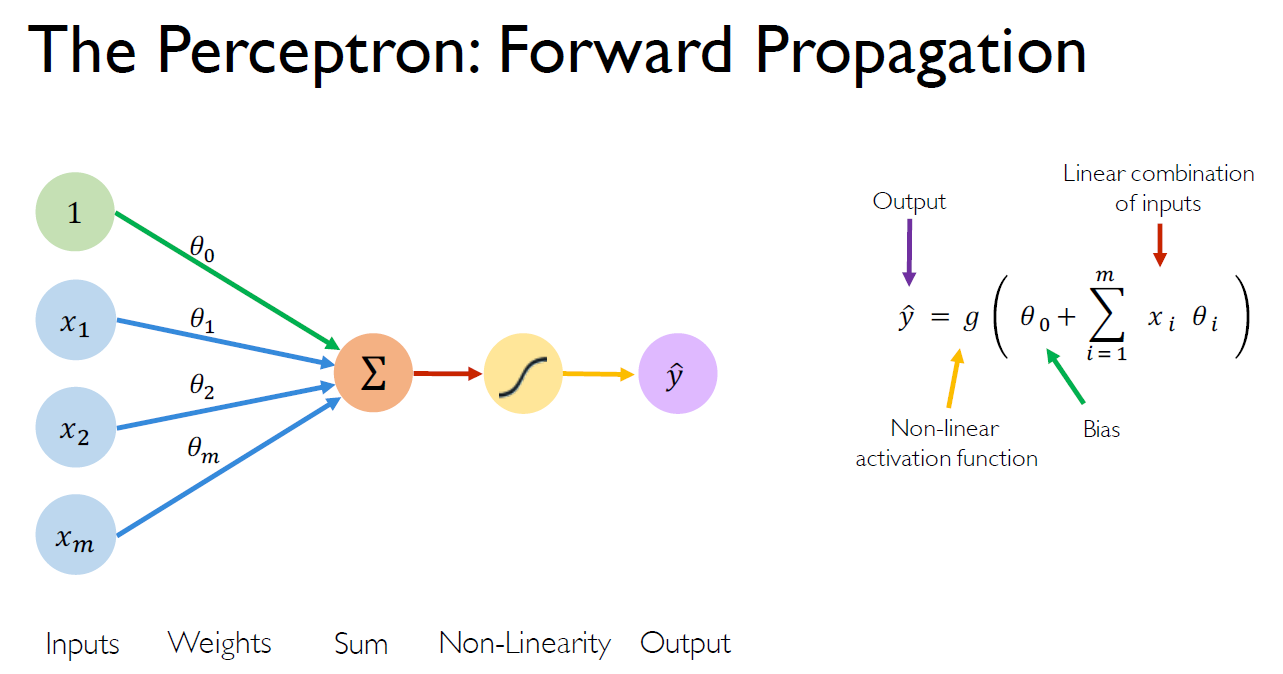

In [71]:
# The merhod which computes the sum of linear combination of previous layer outputs, current layer weights and biases that after 
# are activated by sigmoid activation function
def forward(A_prev, W, b, activation='sigmoid'):
    
    # inputs: A_prev - previous layer outputs
    #         W - current layer weights
    #         b - current layer bias
    # outputs: A - current layer outputs
    #          cache - tuple with such info as: A_prev, W, b, Z
    
    Z = np.dot(W, A_prev) + b
#     print('Z.shape =', Z.shape)
#     print('\nZ\n', Z)
#     print('A_prev.shape =', A_prev.shape)
#     print('W.shape =', W.shape)
#     print('W\n', W)
#     print('b.shape =', b.shape)
#     print('b\n', b)
#     print('\nSigm\n', sigmoid(Z))
    
    if activation == 'relu':
        A, Z = relu(Z)  
    else:
        A, Z = sigmoid(Z)
    cache = (A_prev, W, b, Z)
    return A, cache

In [72]:
# method that uses previous method(forward) for all of the model
def model_forward(X, params):
    
    # inputs: X - input of the model
    #         params - parameters (W, b), that were previously initialised
    # outputs: Y_hat - the model's output? that would be compared with the Y_train later
    #          caches - list with off model's caches 
    
    A_prev = X.copy()
#     print(A.shape)
    L = len(params) // 2
    caches = []
    
    for l in range(1, L):
        A, cache = forward(A_prev, params['W'+str(l)], params['b'+str(l)], 'sigmoid')
        A_prev = A.copy()
        caches.append(cache)
    
#     print(A)
    Y_hat, cache = forward(A_prev, params['W'+str(L)], params['b'+str(L)], 'sigmoid')
    caches.append(cache)
    return Y_hat, caches

In [73]:
Y_hat, caches = model_forward(X_train, params)

In [74]:
Y_hat

array([[0.49821324, 0.49821322, 0.49821323, 0.49821322, 0.49821325,
        0.49821324, 0.49821324, 0.49821319, 0.49821324, 0.49821323,
        0.49821326, 0.49821321, 0.49821319, 0.49821325, 0.49821321,
        0.49821324, 0.49821323, 0.49821324, 0.49821323, 0.49821324,
        0.49821325, 0.49821328, 0.49821323, 0.49821323, 0.49821323,
        0.49821326, 0.49821322, 0.49821323, 0.49821322, 0.49821323,
        0.49821322, 0.49821326, 0.49821322, 0.49821326, 0.49821324,
        0.49821322, 0.49821324, 0.49821324, 0.49821324, 0.49821327,
        0.49821324, 0.49821322, 0.49821325, 0.49821324, 0.49821324,
        0.49821323, 0.49821328, 0.49821321, 0.49821321, 0.49821323,
        0.49821322, 0.49821328, 0.49821322, 0.49821321, 0.49821321,
        0.49821325, 0.49821324, 0.49821326, 0.49821327, 0.49821325,
        0.49821323, 0.49821323, 0.49821319, 0.49821327, 0.49821322,
        0.49821324, 0.49821322, 0.49821323, 0.49821324, 0.49821322,
        0.49821325, 0.49821321, 0.49821325, 0.49

## Cost computation

In [75]:
Y_hat.shape

(1, 241)

In [76]:
# method, which represent the average of the loss functions of the entire training set
def cost(Y_hat, Y_train):
    
    cost =  (-1/Y_train.shape[1])*np.sum(np.multiply(Y_train, np.log(Y_hat)) + np.multiply((1 - Y_train), np.log(1-Y_hat)))
    
    return cost

In [77]:
# check
cost(Y_hat, Y_train)

0.6934649602177015

In [78]:
Y_hat

array([[0.49821324, 0.49821322, 0.49821323, 0.49821322, 0.49821325,
        0.49821324, 0.49821324, 0.49821319, 0.49821324, 0.49821323,
        0.49821326, 0.49821321, 0.49821319, 0.49821325, 0.49821321,
        0.49821324, 0.49821323, 0.49821324, 0.49821323, 0.49821324,
        0.49821325, 0.49821328, 0.49821323, 0.49821323, 0.49821323,
        0.49821326, 0.49821322, 0.49821323, 0.49821322, 0.49821323,
        0.49821322, 0.49821326, 0.49821322, 0.49821326, 0.49821324,
        0.49821322, 0.49821324, 0.49821324, 0.49821324, 0.49821327,
        0.49821324, 0.49821322, 0.49821325, 0.49821324, 0.49821324,
        0.49821323, 0.49821328, 0.49821321, 0.49821321, 0.49821323,
        0.49821322, 0.49821328, 0.49821322, 0.49821321, 0.49821321,
        0.49821325, 0.49821324, 0.49821326, 0.49821327, 0.49821325,
        0.49821323, 0.49821323, 0.49821319, 0.49821327, 0.49821322,
        0.49821324, 0.49821322, 0.49821323, 0.49821324, 0.49821322,
        0.49821325, 0.49821321, 0.49821325, 0.49

In [79]:
print(cost(Y_hat, Y_train))

0.6934649602177015


In [80]:
# method which shows how what proportion of the results obtained coincided with the correct
def accurasy(Y_hat, Y_train):
    Y_hat_acc = Y_hat.copy()
    Y_hat_acc[Y_hat <= 0.5] = 0
    Y_hat_acc[Y_hat > 0.5] = 1
    return (Y_hat_acc == Y_train).sum() / float(Y_train.shape[1])

In [81]:
# check
Y_hat_acc = Y_hat.copy()
Y_hat_acc[Y_hat <= 0.5] = 0
Y_hat_acc[Y_hat > 0.5] = 1
(Y_hat_acc == Y_train).sum() / float(Y_train.shape[1])

0.45643153526970953

## Backward

In [82]:
# function that calculating the gradient of neural network parameters. In short, the method traverses the network 
# in reverse order, from the output to the input layer, according to the chain rule from calculus
def backward(dA, cache, activation):
    
    # inputs: dA - current layer outputs gradient
    #         cache -  tuple with such info as: A_prev, W, b, Z
    #         activation - the name of the activation function whose derivative is to be applied
    # outputs: dA_prev - previous layer outputs gradients
    #          dW - current layer weights gradient
    #          db - current layer bies gradient
    
    A_prev, W, b, Z = cache
    
    if activation == 'relu':
        dZ = relu_prime(dA, Z)
    else:
        dZ = sigmoid_prime(dA, Z)
        
    #dZ = dZ.reshape(dZ.shape[0], 1)
    m = A_prev.shape[1]
    
    dW = (1 / m) * np.dot(dZ, A_prev.T)
    db = (1 / m ) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    
    return dA_prev, dW, db

In [83]:
# method that uses previous method(backward) for all of the model
def model_backward(Y_hat, Y_train, caches):
    
    # inputs: Y_hat - the outputs of the model 
    #         Y_train - correct outputs
    #         caches - list with off model's caches got after forward propagations
    # outputs: grads - dictionary with all of the model's gradients
    
    grads = {}
    L = len(caches)
    m = Y_train.shape[1]
    
    if(Y_train.shape != Y_hat.shape):
        Y_train = Y_train.reshape(Y_hat.shape)
        
    dY_hat = -(np.divide(Y_train, Y_hat) - np.divide((1 - Y_train), (1 - Y_hat)))
    grads['dA'+ str(L-1)], grads['dW'+str(L)], grads['db'+str(L)] = backward(dY_hat, caches[L-1], 'sigmoid')
    
    for l in reversed(range(L-1)):
        dA_prev, dW, db = backward(grads['dA'+str(l+1)], caches[l], 'sigmoid')
        grads['dA'+str(l)] = dA_prev
        grads['dW'+str(l+1)] = dW
        grads['db'+str(l+1)] = db
    
    return grads
    

In [84]:
grads = model_backward(Y_hat, Y_train, caches)

In [85]:
grads

{'dA2': array([[ 0.00468863,  0.00468863,  0.00468863,  0.00468863, -0.00465524,
          0.00468863, -0.00465524, -0.00465524, -0.00465524,  0.00468863,
          0.00468863,  0.00468863,  0.00468863,  0.00468863,  0.00468863,
          0.00468863,  0.00468863,  0.00468863, -0.00465524,  0.00468863,
         -0.00465524, -0.00465524,  0.00468863,  0.00468863,  0.00468863,
          0.00468863,  0.00468863, -0.00465524, -0.00465524, -0.00465524,
          0.00468863, -0.00465524, -0.00465524, -0.00465524, -0.00465524,
          0.00468863, -0.00465524,  0.00468863,  0.00468863, -0.00465524,
          0.00468863, -0.00465524, -0.00465524,  0.00468863, -0.00465524,
         -0.00465524, -0.00465524,  0.00468863, -0.00465524,  0.00468863,
          0.00468863, -0.00465524,  0.00468863,  0.00468863,  0.00468863,
          0.00468863,  0.00468863, -0.00465524, -0.00465524, -0.00465524,
          0.00468863, -0.00465524,  0.00468863, -0.00465524,  0.00468863,
          0.00468863, -0.004655

## Parameters Update

In [86]:
# method which updates the parameters before the next training epoch
def update_params(params, grads, learning_rate = 0.3):
    L = len(params) // 2
    for l in range(1, L+1):
        params['W'+str(l)] = params['W'+str(l)] - learning_rate * grads['dW'+str(l)]
        params['b'+str(l)] = params['b'+str(l)] - learning_rate * grads['db'+str(l)]
    
    return params

In [87]:
params = update_params(params, grads, learning_rate=0.5)
params

{'W1': array([[-0.0012639 ,  0.00105912, -0.00502376,  0.01204486,  0.00136556,
         -0.01631084,  0.00596991, -0.00408487, -0.00825994, -0.00566044,
          0.01890032,  0.00513727, -0.01954532],
        [ 0.00327077,  0.0017348 ,  0.01761818, -0.00069227, -0.00632357,
         -0.00702204, -0.00776914, -0.0083065 ,  0.00558127,  0.01734118,
         -0.00553488, -0.00630197, -0.00067748],
        [-0.01561188, -0.01245359, -0.01265682,  0.01605522, -0.00756431,
          0.0104929 , -0.01024538, -0.0010554 ,  0.00965233,  0.01428352,
         -0.00014396, -0.00109931,  0.00878634],
        [ 0.00112271,  0.00353146,  0.0110571 , -0.00132072,  0.00571305,
          0.01575903, -0.00285242, -0.00676109, -0.00061083, -0.00366254,
          0.01177936,  0.01235501, -0.01665326],
        [ 0.0071436 ,  0.00641633, -0.00327433,  0.01092417, -0.00343492,
         -0.00200904,  0.00354854, -0.00661421,  0.00322493,  0.00595891,
          0.00151794,  0.01764155,  0.01591021]]),
 'b1': 

In [88]:
def train(X_train, Y_train, learning_rate = 0.1, epochs = 100, print_cost = False, print_accuracy = False):
    
    layers = [X_train.shape[0], 10, 8, 6, 4, 2, 1]
    params = params_initialisanion(layers)
    
    
    for i in range(epochs):
        Y_hat, caches = model_forward(X_train, params)
        
        if print_cost and print_accuracy:
            if (i+1) % 10 == 0 or i == 0: 
                print(f'Iteration {i} cost: {cost(Y_hat, Y_train)} | accurasy: {accurasy(Y_hat, Y_train)}')
        elif print_cost == True and print_accuracy == False:
            if (i+1) % 10 == 0 or i == 0: 
                print(f'Iteration {i} cost: {cost(Y_hat, Y_train)}')
        elif print_cost == False and print_accuracy == True:
            if (i+1) % 10 == 0 or i == 0: 
                print(f'Iteration {i} accuracy: {accurasy(Y_hat, Y_train)}')
        else:
            break
        
        grads = model_backward(Y_hat, Y_train, caches)
        
        params = update_params(params, grads, learning_rate)
        
    return params
        

In [89]:
# model training
parameters = train(X_train, Y_train, learning_rate=0.3, epochs=1500, print_cost=True, print_accuracy=True)

### Cost and accurasy methods are working well

Iteration 0 cost: 0.6932346408637994 | accurasy: 0.45643153526970953
Iteration 9 cost: 0.6898015483177724 | accurasy: 0.5435684647302904
Iteration 19 cost: 0.689388256515371 | accurasy: 0.5435684647302904
Iteration 29 cost: 0.6893498801424982 | accurasy: 0.5435684647302904
Iteration 39 cost: 0.6893463066917346 | accurasy: 0.5435684647302904
Iteration 49 cost: 0.689345973639804 | accurasy: 0.5435684647302904
Iteration 59 cost: 0.6893459425898476 | accurasy: 0.5435684647302904
Iteration 69 cost: 0.6893459396948488 | accurasy: 0.5435684647302904
Iteration 79 cost: 0.689345939424921 | accurasy: 0.5435684647302904
Iteration 89 cost: 0.6893459393997529 | accurasy: 0.5435684647302904
Iteration 99 cost: 0.6893459393974062 | accurasy: 0.5435684647302904
Iteration 109 cost: 0.6893459393971874 | accurasy: 0.5435684647302904
Iteration 119 cost: 0.6893459393971669 | accurasy: 0.5435684647302904
Iteration 129 cost: 0.6893459393971649 | accurasy: 0.5435684647302904
Iteration 139 cost: 0.6893459393971

Iteration 1249 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1259 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1269 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1279 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1289 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1299 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1309 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1319 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1329 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1339 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1349 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1359 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1369 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iteration 1379 cost: 0.6893459393971647 | accurasy: 0.5435684647302904
Iterat

In [90]:
Y_hat

array([[0.49821324, 0.49821322, 0.49821323, 0.49821322, 0.49821325,
        0.49821324, 0.49821324, 0.49821319, 0.49821324, 0.49821323,
        0.49821326, 0.49821321, 0.49821319, 0.49821325, 0.49821321,
        0.49821324, 0.49821323, 0.49821324, 0.49821323, 0.49821324,
        0.49821325, 0.49821328, 0.49821323, 0.49821323, 0.49821323,
        0.49821326, 0.49821322, 0.49821323, 0.49821322, 0.49821323,
        0.49821322, 0.49821326, 0.49821322, 0.49821326, 0.49821324,
        0.49821322, 0.49821324, 0.49821324, 0.49821324, 0.49821327,
        0.49821324, 0.49821322, 0.49821325, 0.49821324, 0.49821324,
        0.49821323, 0.49821328, 0.49821321, 0.49821321, 0.49821323,
        0.49821322, 0.49821328, 0.49821322, 0.49821321, 0.49821321,
        0.49821325, 0.49821324, 0.49821326, 0.49821327, 0.49821325,
        0.49821323, 0.49821323, 0.49821319, 0.49821327, 0.49821322,
        0.49821324, 0.49821322, 0.49821323, 0.49821324, 0.49821322,
        0.49821325, 0.49821321, 0.49821325, 0.49

## Next steps where made in an attempt to understand what exactly in the previous steps does not allow the machine to learn normally.  Please, if you notice an error, tell me about it so that I can analyze it and fix it.  Thank you.

In [91]:
Y_hat_copy = Y_hat.copy()
Y_hat_copy[Y_hat_copy <= 0.497] = 0
Y_hat_copy[Y_hat_copy > 0.496] = 1

In [92]:
Y_hat_copy

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [93]:
Y_train

array([[1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]],
      dtype=int64)

## ML model using Sklearn library
#### I used this model to understend how optimal is my model

In [94]:
X_train.shape

(13, 241)

In [95]:
X_train_reshape = X_train.reshape(X_train.shape[1], X_train.shape[0])

In [96]:
X_train_reshape.shape

(241, 13)

In [97]:
Y_train.shape

(1, 241)

In [98]:
Y_train_reshape = Y_train.reshape(Y_train.shape[1], Y_train.shape[0])

In [99]:
Y_train_reshape.shape

(241, 1)

In [100]:
X_test.shape

(13, 61)

In [101]:
X_test_reshape = X_test.reshape(X_test.shape[1], X_test.shape[0])

In [102]:
X_test_reshape.shape

(61, 13)

In [103]:
Y_test.shape

(1, 61)

In [104]:
Y_test_reshape = Y_test.reshape(Y_test.shape[1], Y_test.shape[0])

In [105]:
Y_test_reshape.shape

(61, 1)

In [106]:
model = LogisticRegression()

In [107]:
model.fit(X_train_reshape, Y_train_reshape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [108]:
X_train_predition = model.predict(X_train_reshape)
training_data_accuracy = accuracy_score(X_train_predition, Y_train_reshape)
print('Accuracy on trainig set:', training_data_accuracy)

Accuracy on trainig set: 0.5601659751037344


In [109]:
# X_test prediction
X_test_predition = model.predict(X_test_reshape)
testing_data_accuracy = accuracy_score(X_test_predition, Y_test_reshape)
print('Accuracy on testing set:', testing_data_accuracy)

Accuracy on testing set: 0.5081967213114754
